## Задание 2. Функция автокорреляции скорости

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from collections import defaultdict

Парсим `.xyz` файлы:

In [2]:
paths = [f'dump_216_1.2/{i}.xyz' for i in np.arange(1000, 5000, 1)]
number_of_particles = int(open(paths[0]).readline())
box_size = float(open(paths[0]).readlines()[1].split()[1])

xyz = [pd.DataFrame([line.split()
                     for line in open(path).readlines()[2:]]).drop(labels=[0, 1, 2], axis=1)
                     for path in paths]

for df in xyz: df.columns = ['vx', 'vy', 'vz']

Переформатируем их для более удобной обработки:

In [3]:
vel = np.array([[xyz[frame].iloc[n].to_numpy().astype(float)
                 for n in range(number_of_particles)]
                 for frame in range(len(xyz))])

Определим функцию для расчета `vacf` из массива скоростей

In [5]:
def vacf(vel: np.array, len: int, step: int):
    '''
    vel -- массив скоростей. По оси 0 -- время, по оси 1 -- номер частицы
    len -- число максимальное время, для которого считаем автокорреляцию

    Если хотим усреднить vacf, можем посчитать его из разных начальных точек.
    step -- время между двумя различными стартовыми точками
    '''
    velcor = np.zeros(len)
    dot = np.zeros(vel.shape[1])
    amp = np.zeros(vel.shape[1])

    counter = 0
    for start in np.arange(0, (vel.shape[0] - len), step):
        for frame in range(len):
            for n in range(vel.shape[1]):
                dot[n] = np.dot(vel[start][n], vel[start + frame][n])
                amp[n] = np.linalg.norm(np.array(vel[frame + start][n]))

            velcor[frame] += np.mean(dot) / np.mean(amp*amp)
        counter += 1
    
    velcor /= counter

    return velcor

In [6]:
len = 300
step = 10
x = np.arange(0, len)
y = vacf(vel, len, step)

Получили график `vacf` для температуры 1.0 и плотности 0.5:

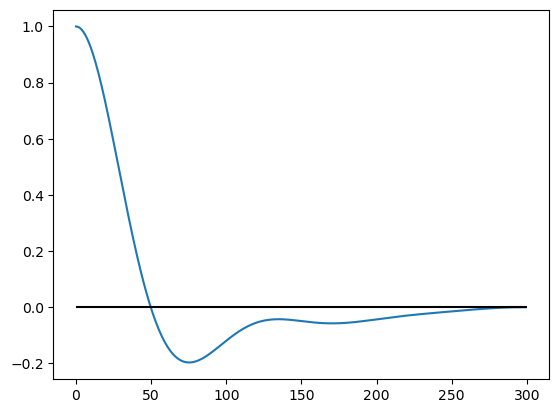

In [11]:
plt.plot(x, y)
plt.hlines(0, 0, 300, 'k')